In [1]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [3]:
data_dir = '/content/drive/MyDrive/cs114.hwdr'

In [335]:
data_2025 = '/content/drive/MyDrive/data.2025'

In [4]:
 from torchvision import datasets
 from torchvision.transforms import ToTensor

In [5]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True,
)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [8]:
train_data.targets.size()

torch.Size([60000])

In [9]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [10]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [11]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [12]:
test_data.targets.size()

torch.Size([10000])

In [13]:
test_data.targets

tensor([7, 2, 1,  ..., 4, 5, 6])

In [14]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1),
    'test'  : DataLoader(test_data,
                         batch_size=100,
                         shuffle=False,
                         num_workers=1),
}

In [15]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7e31d95835d0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7e32d8bbe190>}

In [16]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1,10, kernel_size=5)
        self.conv2 = nn.Conv2d(10,20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return x

In [17]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

error = nn.CrossEntropyLoss()

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')

In [18]:
for epoch in range(1,11):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	2.325001
Train Epoch: 1 [2000/60000 (3%)]	2.245045
Train Epoch: 1 [4000/60000 (7%)]	1.744776
Train Epoch: 1 [6000/60000 (10%)]	0.996704
Train Epoch: 1 [8000/60000 (13%)]	0.822061
Train Epoch: 1 [10000/60000 (17%)]	0.767611
Train Epoch: 1 [12000/60000 (20%)]	0.694880
Train Epoch: 1 [14000/60000 (23%)]	0.733726
Train Epoch: 1 [16000/60000 (27%)]	0.506026
Train Epoch: 1 [18000/60000 (30%)]	0.493372
Train Epoch: 1 [20000/60000 (33%)]	0.588058
Train Epoch: 1 [22000/60000 (37%)]	0.431786
Train Epoch: 1 [24000/60000 (40%)]	0.497605
Train Epoch: 1 [26000/60000 (43%)]	0.472104
Train Epoch: 1 [28000/60000 (47%)]	0.430152
Train Epoch: 1 [30000/60000 (50%)]	0.268300
Train Epoch: 1 [32000/60000 (53%)]	0.341884
Train Epoch: 1 [34000/60000 (57%)]	0.341721
Train Epoch: 1 [36000/60000 (60%)]	0.342242
Train Epoch: 1 [38000/60000 (63%)]	0.533174
Train Epoch: 1 [40000/60000 (67%)]	0.471410
Train Epoch: 1 [42000/60000 (70%)]	0.319248
Train Epoch: 1 [44000/60000 (73%)]	0.339103

In [21]:
device

device(type='cpu')

Prediction: 7


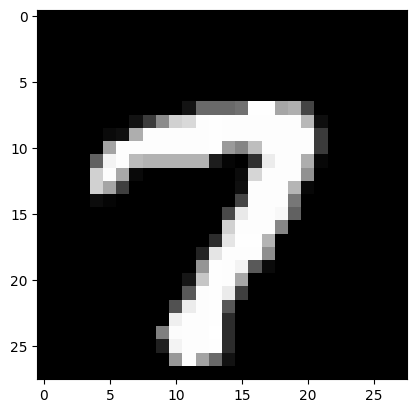

In [255]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[9567]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1,keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

In [24]:
torch.save(model.state_dict(), '/content/drive/MyDrive/cnn_model.pth')
print("✅ Model đã được lưu vào Google Drive")

✅ Model đã được lưu vào Google Drive


In [350]:
from scipy import ndimage
import cv2
import numpy as np
from PIL import Image
import torchvision.transforms as transforms

def auto_threshold_params(image_np):
    std = np.std(image_np)
    if std < 30:
        return 11, 2
    elif std < 50:
        return 15, 4
    else:
        return 21, 6

def remove_lines(thresh_img):
    # Kernel cho đường ngang và dọc
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 40))

    # Tìm và loại bỏ đường ngang
    horizontal_lines = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
    # Tìm và loại bỏ đường dọc
    vertical_lines = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, vertical_kernel, iterations=1)

    # Kết hợp các đường
    lines = cv2.bitwise_or(horizontal_lines, vertical_lines)

    # Trừ đường kẻ ra khỏi ảnh
    cleaned = cv2.subtract(thresh_img, lines)
    return cleaned

def center_image(img):
    cy, cx = ndimage.center_of_mass(img)
    shiftx = np.round(img.shape[1] / 2.0 - cx).astype(int)
    shifty = np.round(img.shape[0] / 2.0 - cy).astype(int)
    return ndimage.shift(img, shift=(shifty, shiftx), mode='constant', cval=0)

def preprocess_image(img_path):
    image = Image.open(img_path).convert("L")
    image_np = np.array(image)

    # Adaptive threshold với blockSize và C tự động
    blockSize, C = auto_threshold_params(image_np)
    blurred = cv2.GaussianBlur(image_np, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, blockSize, C)

    # Xóa đường kẻ ô tập
    thresh_clean = remove_lines(thresh)

    # Tìm contour
    contours, _ = cv2.findContours(thresh_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    valid_contours = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if h > 10 and w > 5:
            valid_contours.append(c)

    if not valid_contours:
        raise ValueError("Không có contour đủ lớn")

    xs, ys, xe, ye = [], [], [], []
    for c in valid_contours:
        x, y, w, h = cv2.boundingRect(c)
        xs.append(x)
        ys.append(y)
        xe.append(x + w)
        ye.append(y + h)
    x1, y1 = max(min(xs) - 5, 0), max(min(ys) - 5, 0)
    x2, y2 = min(max(xe) + 5, thresh.shape[1]), min(max(ye) + 5, thresh.shape[0])

    digit = thresh_clean[y1:y2, x1:x2]
    digit = cv2.resize(digit, (20, 20), interpolation=cv2.INTER_AREA)
    digit = np.pad(digit, ((4, 4), (4, 4)), mode='constant', constant_values=0)
    digit = center_image(digit)

    tensor = transforms.ToTensor()(digit).unsqueeze(0)
    return tensor


In [345]:
model = CNN()  # Ví dụ: CNN() hoặc ResNet18(...)
model.load_state_dict(torch.load('/content/drive/MyDrive/cnn_model.pth', map_location=device))
model = model.to(device)
model.eval()


CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [351]:
def predict_single_image(filename):
    path = os.path.join('/content/drive/MyDrive/cs114.hwdr', filename)
    tensor_image = preprocess_image(path).to(device)

    with torch.no_grad():
        output = model(tensor_image)
        pred = output.argmax(dim=1).item()

    print(f"✅ Dự đoán ảnh `{filename}` là số: {pred}")
    plt.imshow(tensor_image.squeeze().cpu().numpy(), cmap='gray')
    plt.title(f'Predicted: {pred}')
    plt.axis('off')
    plt.show()
    return pred


In [347]:
import os

✅ Dự đoán ảnh `0003f95fe5b6aea891f325385aa6032b  -.jpg` là số: 4


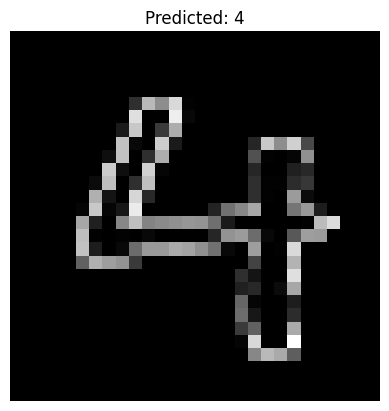

✅ Dự đoán ảnh `000caf706334cf9598988fbf3e103a0c  -.jpg` là số: 8


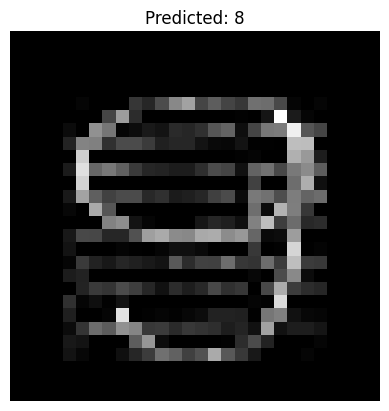

✅ Dự đoán ảnh `00165d6f69c3be0eeb5d6d25c178daae  -.png` là số: 7


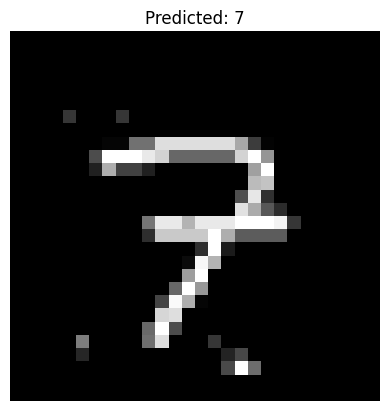

✅ Dự đoán ảnh `0046d4f9232ff35acf873edaff070522  -.png` là số: 4


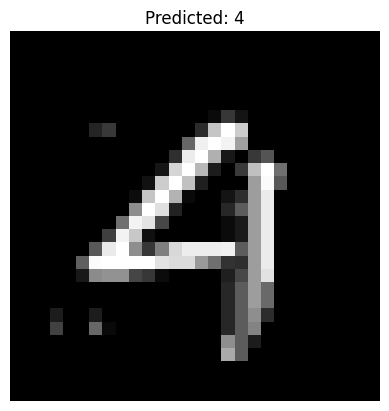

✅ Dự đoán ảnh `004ddc4f534a704ea71855acd75c2847  -.jpg` là số: 4


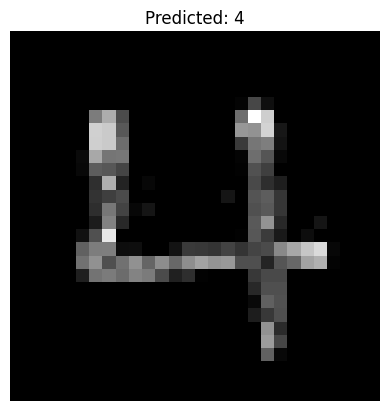

✅ Dự đoán ảnh `005c9b878a991542a9ef16d08d4fefc0  -.jpg` là số: 5


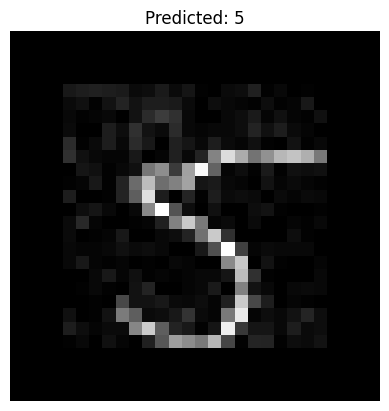

✅ Dự đoán ảnh `005deceb590ce0fd4f372d0fdaf11315  -.png` là số: 0


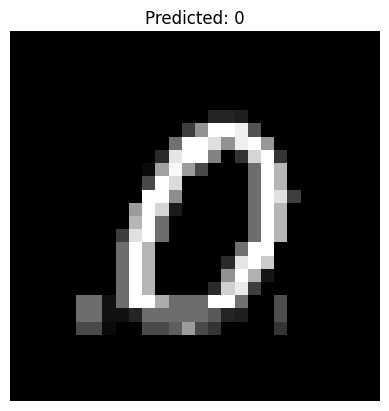

✅ Dự đoán ảnh `006c571c090bc36b06c2a1afff6e6454  -.jpg` là số: 0


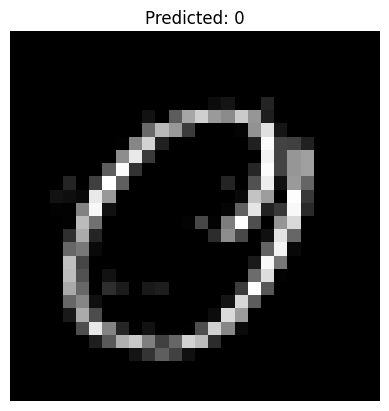

✅ Dự đoán ảnh `0088eefbcb1fb77d445ae0119396d121  -.jpg` là số: 4


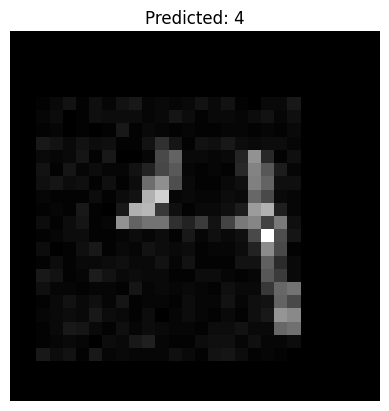

✅ Dự đoán ảnh `00a868f39ea809d774caf47e9a4f4fdb  -.jpg` là số: 6


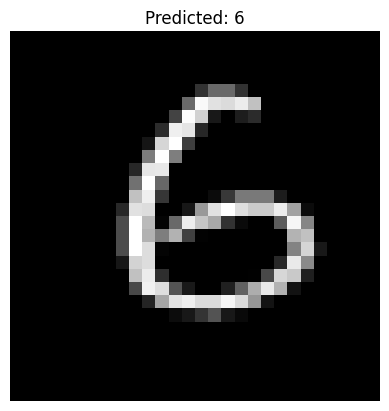

✅ Dự đoán ảnh `00ab399ec62aa68f59dcbf958d7a37c8  -.jpg` là số: 1


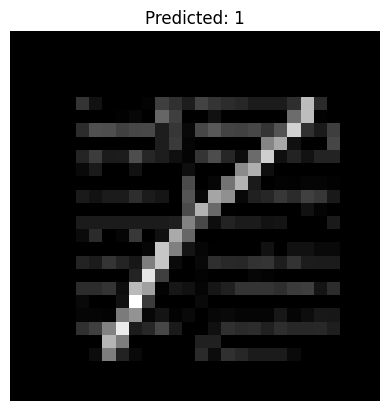

✅ Dự đoán ảnh `00c6d06c2c643aa73762bba95c209a84  -.png` là số: 5


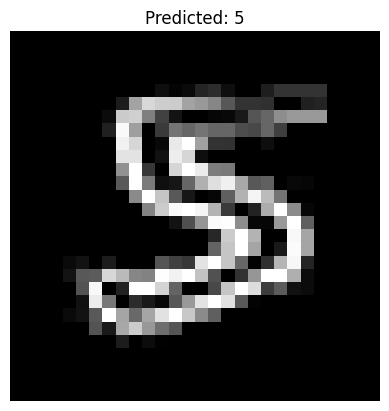

✅ Dự đoán ảnh `00d9f4112797c50d4d060fec9390ab8b  -.jpg` là số: 1


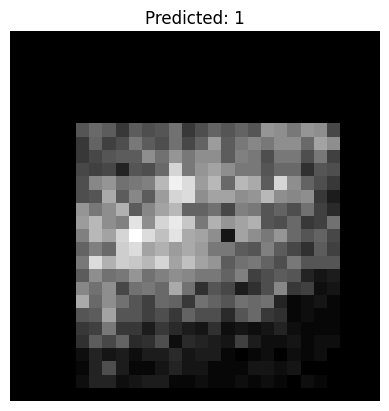

✅ Dự đoán ảnh `00fc80d82e187839c67b437376afecb7  -.jpg` là số: 2


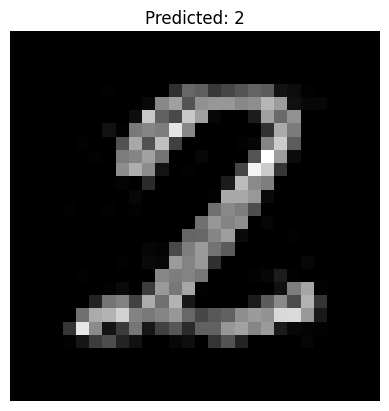

✅ Dự đoán ảnh `0103e1ce71772ffe469463420a3ea1e8  -.jpg` là số: 8


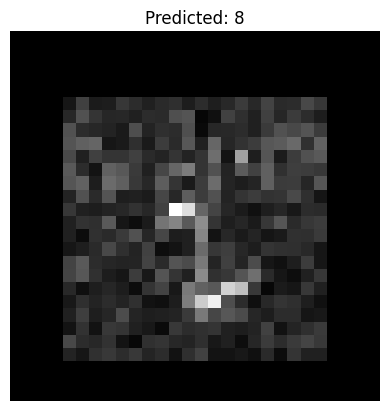

✅ Dự đoán ảnh `011b2ce56b890dd986e5da4012eccfa2  -.JPG` là số: 1


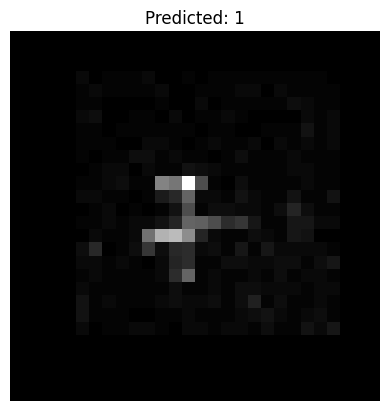

✅ Dự đoán ảnh `013125b0fe96e385744d6658433bb69f  -.jpg` là số: 8


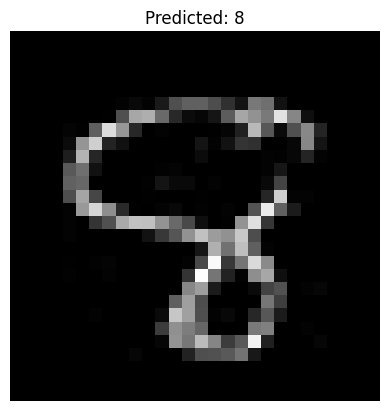

✅ Dự đoán ảnh `013c1b9846746bcb95f05730a4f7bedd  -.jpg` là số: 8


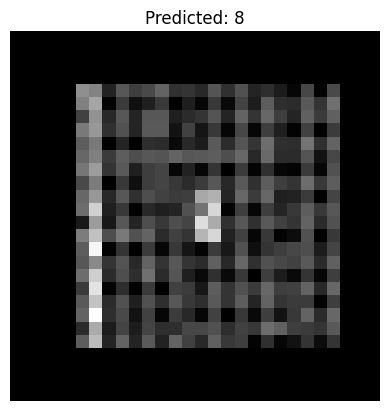

✅ Dự đoán ảnh `01431e6d28e82d1a60c6d92f252a0315  -.png` là số: 5


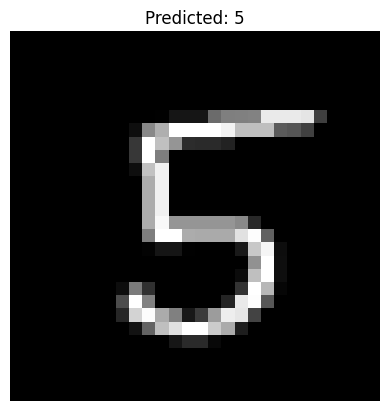

✅ Dự đoán ảnh `014d8558151ea9191524c9b5e3319354  -.png` là số: 5


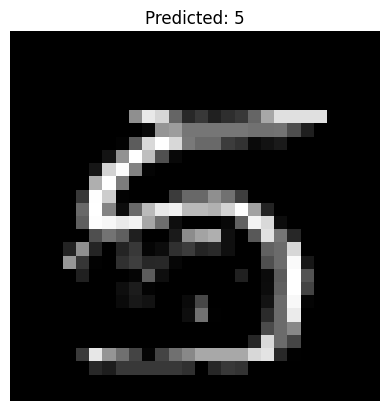

In [352]:
from os import listdir
import os # Import the os module if it's not already imported in this cell

sample_images = sorted([f for f in os.listdir('/content/drive/MyDrive/cs114.hwdr') if f.lower().endswith(('.heic', '.jpg', '.png', '.jpeg'))])[:20]
for f in sample_images:
    predict_single_image(f)

In [353]:
import pyheif
from PIL import Image

def read_image(path):
    if path.lower().endswith('.heic'):
        heif_file = pyheif.read(path)
        image = Image.frombytes(
            heif_file.mode, heif_file.size, heif_file.data,
            "raw", heif_file.mode, heif_file.stride,
        )
        return np.array(image)
    else:
        image = cv2.imread(path)
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [331]:
!pip install pyheif

In [ ]:
from tqdm import tqdm
import pandas as pd # Import the pandas library

results = []

for filename in tqdm(sorted(os.listdir(data_2025))):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.heic',".jfif")):
        try:
            path = os.path.join(data_2025, filename)
            # Ensure preprocess_image is defined and available in this scope
            image = preprocess_image(path).to(device)
            with torch.no_grad():
                output = model(image)
                pred = output.argmax(dim=1).item()
                results.append((filename, pred))
        except Exception as e:
            print(f"Lỗi xử lý {filename}: {e}")

# === Ghi ra file submission.csv ===
df = pd.DataFrame(results, columns=["filename", "digit"])
df.to_csv("submission.csv", index=False, header=False)
print("✅ Đã lưu file submission.csv xong!")

In [234]:
import os
from datetime import datetime
import pandas as pd

# === 1. Tạo thư mục mới theo thời gian thực ===
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_dir = f"/content/results/result_{timestamp}"
os.makedirs(result_dir, exist_ok=True)

# === 2. Lưu file submission.csv ===
df = pd.DataFrame(results, columns=["filename", "digit"])
csv_path = os.path.join(result_dir, "submission.csv")
df.to_csv(csv_path, index=False, header=False)
print(f"✅ Đã lưu: {csv_path}")

# === 3. Lưu code preprocesses và remove_lines ===
preprocess_code = """
from scipy import ndimage
import cv2
import numpy as np
from PIL import Image
import torchvision.transforms as transforms

def auto_threshold_params(image_np):
    std = np.std(image_np)
    if std < 30:
        return 11, 2
    elif std < 50:
        return 15, 4
    else:
        return 21, 6

def remove_lines(thresh_img):
    # Kernel cho đường ngang và dọc
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 40))

    # Tìm và loại bỏ đường ngang
    horizontal_lines = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
    # Tìm và loại bỏ đường dọc
    vertical_lines = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, vertical_kernel, iterations=1)

    # Kết hợp các đường
    lines = cv2.bitwise_or(horizontal_lines, vertical_lines)

    # Trừ đường kẻ ra khỏi ảnh
    cleaned = cv2.subtract(thresh_img, lines)
    return cleaned

def center_image(img):
    cy, cx = ndimage.center_of_mass(img)
    shiftx = np.round(img.shape[1] / 2.0 - cx).astype(int)
    shifty = np.round(img.shape[0] / 2.0 - cy).astype(int)
    return ndimage.shift(img, shift=(shifty, shiftx), mode='constant', cval=0)

def preprocess_image(img_path):
    image = Image.open(img_path).convert("L")
    image_np = np.array(image)

    # Adaptive threshold với blockSize và C tự động
    blockSize, C = auto_threshold_params(image_np)
    blurred = cv2.GaussianBlur(image_np, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, blockSize, C)

    # Xóa đường kẻ ô tập
    thresh_clean = remove_lines(thresh)

    # Tìm contour
    contours, _ = cv2.findContours(thresh_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    valid_contours = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if h > 10 and w > 5:
            valid_contours.append(c)

    if not valid_contours:
        raise ValueError("Không có contour đủ lớn")

    xs, ys, xe, ye = [], [], [], []
    for c in valid_contours:
        x, y, w, h = cv2.boundingRect(c)
        xs.append(x)
        ys.append(y)
        xe.append(x + w)
        ye.append(y + h)
    x1, y1 = max(min(xs) - 5, 0), max(min(ys) - 5, 0)
    x2, y2 = min(max(xe) + 5, thresh.shape[1]), min(max(ye) + 5, thresh.shape[0])

    digit = thresh_clean[y1:y2, x1:x2]
    digit = cv2.resize(digit, (20, 20), interpolation=cv2.INTER_AREA)
    digit = np.pad(digit, ((4, 4), (4, 4)), mode='constant', constant_values=0)
    digit = center_image(digit)

    tensor = transforms.ToTensor()(digit).unsqueeze(0)
    return tensor


"""
code_path = os.path.join(result_dir, "preprocessing_code.py")
with open(code_path, "w") as f:
    f.write(preprocess_code)
print(f"🛠️ Đã lưu code xử lý ảnh: {code_path}")


# === 4. Nhập nội dung ghi chú và lưu vào note.txt ===
note = input("✍️ Nhập ghi chú :\n")
note_path = os.path.join(result_dir, "note.txt")
with open(note_path, "w") as f:
    f.write(note)
print(f"📝 Đã lưu ghi chú: {note_path}")

✅ Đã lưu: /content/results/result_20250623_213934/submission.csv
🛠️ Đã lưu code xử lý ảnh: /content/results/result_20250623_213934/preprocessing_code.py
✍️ Nhập ghi chú :
274025
📝 Đã lưu ghi chú: /content/results/result_20250623_213934/note.txt
